## Final Project Submission

Please fill out:
* Student name: Cassie Nutter
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


Import necessary tools for project here

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load data files here

In [56]:
title_basics_df = pd.read_csv ('zippedData/imdb.title.basics.csv.gz')
title_ratings_df = pd.read_csv ('zippedData/imdb.title.ratings.csv.gz')
movie_gross_df = pd.read_csv ('zippedData/bom.movie_gross.csv.gz')
movie_budgets_df = pd.read_csv ('zippedData/tn.movie_budgets.csv.gz')

In [57]:
print (title_basics_df.info())
title_basics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [58]:
print (title_ratings_df.info())
title_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [59]:
print(movie_gross_df.info())
movie_gross_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [60]:
print (movie_budgets_df.info())
movie_budgets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Find most popular month to release a movie

In [61]:
movie_budgets_df ['release_month'] = movie_budgets_df['release_date'].map(lambda x: x [:3])

In [62]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec


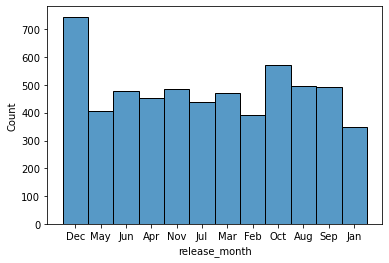

In [63]:
sns.histplot(movie_budgets_df.release_month)
plt.show()

December looks like the most popular month to release a movie, followed by October.

January is the least popular month for movie releases.

...But does that mean these movies make money? Or is that just a time when people decide to release them?

### See how much movies make based on release month

First, turn strings to integers and remove '$' and ','

In [64]:
movie_budgets_df['domestic_gross'] = [x.strip('$') for x in movie_budgets_df['domestic_gross']]
movie_budgets_df['domestic_gross'] = movie_budgets_df ['domestic_gross'].str.replace(',', '')

movie_budgets_df['production_budget'] = [x.strip('$') for x in movie_budgets_df['production_budget']]
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace(',', '')

movie_budgets_df['worldwide_gross'] = [x.strip ('$') for x in movie_budgets_df['worldwide_gross']]
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace(',', '')

In [65]:
#Check that it worked!
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec


In [66]:
#Turn the strings into integers
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype(int)
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].astype(int)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(int)

In [67]:
#Did it work?
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
 6   release_month      5782 non-null   object
dtypes: int64(4), object(3)
memory usage: 316.3+ KB


### Great! So let's plot it!

/Users/cassienutter/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


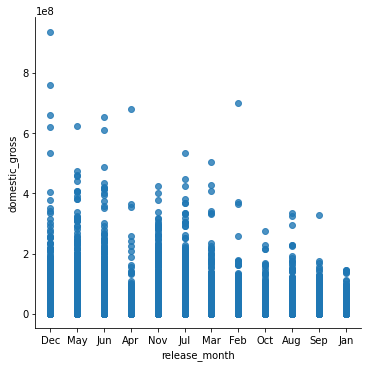

In [68]:
sns.lmplot( 'release_month', 'domestic_gross', data=movie_budgets_df, fit_reg=False)

In [69]:
dom_gross_df = movie_budgets_df.sort_values (by= 'domestic_gross', ascending= False).reset_index()

In [70]:
dom_gross_df.head(10)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Dec
1,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Dec
2,41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,Feb
3,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr
4,42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,Dec
5,33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jun
6,26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,May
7,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec
8,43,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,Jun
9,74,75,"Jul 18, 2008",The Dark Knight,185000000,533720947,1001996207,Jul


Using the graph, we can see that movies that are released in December do well in the box office (domestically). Out of the top 10 movies that made the most, 4 were released in December.

But what about worldwide? Does December prove a good month for that too?

/Users/cassienutter/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


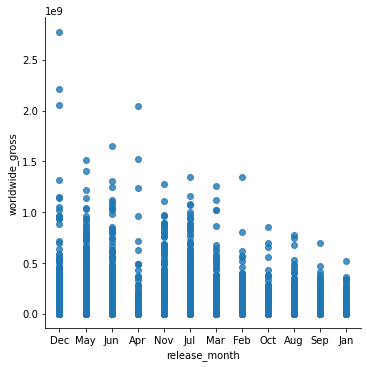

In [71]:
sns.lmplot ('release_month', 'worldwide_gross', data = movie_budgets_df, fit_reg = False)

In [72]:
world_gross_df = movie_budgets_df.sort_values(by= 'worldwide_gross', ascending= False).reset_index()

In [73]:
world_gross_df.head(10)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Dec
1,42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,Dec
2,5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Dec
3,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr
4,33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jun
5,66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Apr
6,26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,May
7,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May
8,41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,Feb
9,260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,Jul


The top 3 highest grossing movies worldwide were all released in December!

### Conclusion: December is a good time to release a movie
Also, the top movies that were released in December were released mid-December. If releasing in December, choose a day in the middle of the month.

## Explore other datasets

In [79]:
title_basics_df.isna().any()
title_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Going to drop the runtime_minutes column. Not going to do an analysis with it and it has such a large amount of missing data. Don't want to delete all of entries because there is still some good information there.

In [80]:
new_title_basics_df = title_basics_df.drop(columns = 'runtime_minutes', axis = 1)

In [85]:
len (new_title_basics_df)

146144

Going to join another file and then see the other missing values that are present.

In [87]:
titles_together_df = pd.merge(new_title_basics_df, title_ratings_df, how = 'left', left_on = 'tconst', right_on = 'tconst')

In [90]:
# len (titles_together_df)
# titles_together_df.head()
titles_together_df.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
genres             5408
averagerating     72288
numvotes          72288
dtype: int64

In [94]:
# titles_together_df.dropna (axis = 1, subset = 'original_title')

TypeError: Index(...) must be called with a collection of some kind, 'original_title' was passed